### Задачи

Доделать QE

Построить графики

Сравнение результатов

Зависимость скорости ответа от порядкового номера вопроса

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1=pd.read_csv('data.csv', sep='\t')

#### Описание данных

**1. Набор ответов на тест Q** (42 вопроса в рандомном порядке, где предлагается оценить, как часто он испытывал предложенные ощущения на протяжении последних 2-х недель)

***Q_i_A*** - ответ на i вопрос от 1 до 4, где 1 - никогда, 4 - очень часто или постоянно

***Q_i_E*** - количество милисекунд, потраченных на ответ

***Q_i_I*** - порядковый номер вопроса для данного участника

***introelapse*** The time spent on the introduction/landing page (in seconds) 

***testelapse***		The time spent on all the DASS questions (should be equivalent to the time elapsed on all the indiviudal questions combined)

***surveyelapse***	The time spent answering the rest of the demographic and survey questions

**2. Набор ответов на тест TIPI** (10 утверждений, предлагается оценить, насколько учатник согласен с каждым из них, по шкале от 1 - абсолютно не согласен, 7 - абсолютно согласен)

**3. Ответы на тест VCL** (предложено 16 слов, предлагается отметить, какие из них участник точно знает)

**4. Персональные данные**

***education***			 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree

***urban (в детстве)***				 1=Rural (country side), 2=Suburban, 3=Urban (town, city)

***gender***				1=Male, 2=Female, 3=Other

***engnat***				1=Yes, 2=No

***age***					

***hand***				1=Right, 2=Left, 3=Both

***religion***			1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other


***race***				10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other

***voted***				1=Yes, 2=No

***married***				1=Never married, 2=Currently married, 3=Previously married

***familysize***	(количество детей у матери)		

***major***				

**5. Технические данные**

***country***				

***screensize***			1=device with small screen (phone, etc), 2=device with big screen (laptop, desktop, etc)

***uniquenetworklocation***		1=only one survey from user's specific network in dataset, 2=multiple surveys submitted from the network of this user  (2 does not necessarily imply duplicate records for an individual, as it could be different students at a single school or different memebers of the same household; and even if 1 there still could be duplicate records from a single individual e.g. if they took it once on their wifi and once on their phone)

***source***			1=from the front page of the site hosting the survey, 2=from google, 0=other or unknown

Проверим наличие пропущенных данных (датасет слишком большой чтобы использовать info())

In [3]:
file1.shape

(39775, 171)

In [4]:
pd.options.display.max_info_columns

100

In [3]:
for col in file1.columns:
    a=np.mean(file1[col].isnull())
    if a!=0:
        print(col, a)

country 5.02828409805154e-05
major 0.2866876178504085


In [4]:
file1[['major', 'country']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   major    28372 non-null  object
 1   country  39773 non-null  object
dtypes: object(2)
memory usage: 621.6+ KB


In [5]:
file1['major']=file1['major'].fillna('no')
file1['country']=file1['country'].fillna('no')

Проверим выбросы

In [8]:
bad_ans=[]
for col in ['Q'+str(i)+'A' for i in range(1,43)]:
    bad_ans+=(list(file1[~file1[col].isin([1,2,3,4])].index))
bad_ans #Ответы на тест Q заполнены правильно

[]

In [6]:
#Переведём время ответов в секунды
file1[['Q'+str(i)+'E' for i in range(1,43)]]=file1[['Q'+str(i)+'E' for i in range(1,43)]]/1000

In [7]:
file1['testelapse'].describe() #нет отрицательных значений, есть явные выбросы

count    3.977500e+04
mean     2.684843e+03
std      1.482418e+05
min      1.200000e+01
25%      1.650000e+02
50%      2.130000e+02
75%      2.960000e+02
max      2.082972e+07
Name: testelapse, dtype: float64

In [8]:
file1[['Q'+str(i)+'E' for i in range(1,43)]].describe() #есть отрицательные значения - поменяем на противоположные
#есть явные выбросы

,Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,...,Q33E,Q34E,Q35E,Q36E,Q37E,Q38E,Q39E,Q40E,Q41E,Q42E
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,6.970591,5.332376,7.426446,7.128728,5.919306,5.724097,9.776971,4.444627,18.330829,9.157494,...,5.272239,4.871684,14.105871,4.335748,6.811023,5.838114,8.472124,10.274100,5.540696,8.300695
std,86.705132,26.513611,158.702353,75.984858,64.282067,50.195831,442.758756,22.916182,1409.724444,418.635469,...,51.466986,108.623401,376.000379,30.703420,76.601331,301.126024,168.614116,320.856859,59.782867,77.650779
min,0.180000,0.176000,-10.814000,0.176000,0.178000,0.178000,0.178000,0.179000,0.177000,-19.695000,...,0.179000,-1.615000,0.183000,0.178000,-0.165000,-8.921000,-0.144000,0.178000,-0.159000,0.178000
25%,2.664000,2.477000,2.857000,2.949000,2.327000,2.369000,2.641500,2.104500,4.218000,2.427000,...,2.162000,1.922000,4.317500,1.681000,2.883000,1.897000,2.130500,3.393500,2.237000,3.070000
50%,3.609000,3.511000,3.898000,4.258000,3.237000,3.248000,3.702000,2.871000,6.139000,3.375000,...,2.993000,2.653000,6.499000,2.254000,4.054000,2.602000,2.930000,4.629000,3.052000,4.373000
75%,5.358000,5.216000,5.766000,6.285000,4.849000,4.788000,5.362000,4.239500,9.245000,5.027000,...,4.608000,4.003500,10.388000,3.484000,5.924000,3.934500,4.940000,6.733000,4.518000,6.681000
max,12102.282000,2161.057000,28582.689000,9488.330000,9467.497000,5426.858000,74124.488000,2103.626000,279772.213000,74471.124000,...,8658.903000,21328.973000,72970.668000,4133.123000,12710.289000,59401.008000,31773.217000,56297.555000,8021.110000,7750.098000


In [9]:
for col in ['Q'+str(i)+'E' for i in range(1,43)]:
    mask=(file1[col]<0)
    file1.loc[mask, col]*=-1

In [10]:
pd.Series(file1['testelapse']-file1[['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1)).describe()
#проверим разницу между реальной длительностью теста и записанной в столбце testelapse

count    3.977500e+04
mean     2.364809e+03
std      1.482231e+05
min     -2.295600e+01
25%      1.030500e+00
50%      2.237000e+00
75%      1.201700e+01
max      2.082853e+07
dtype: float64

In [166]:
#есть отрицательные значения (разница небольшая, проверить сами цифры, если всё ок, то просто пересчитать итоговое)
#выделить явные выбросы (где выбросы в критериях и где в итоге)
#если одновременные выбросы, поправить медианой время ответа и пересчитать итоговое
#если выбросы в ответах, то уменьшить их так, чтобы соответствовали итоговому
#если выброс в итоговом, то уменьшить его до реальной суммы

In [11]:
file1['time_diff']=file1['testelapse']-file1[['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1)

In [12]:
qe_names=['Q'+str(i)+'E' for i in range(1,43)]+['testelapse']
(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42).describe()

count    3.977500e+04
mean     2.520614e+03
std      1.482396e+05
min     -9.715000e+01
25%      3.254050e+01
50%      5.389800e+01
75%      1.036980e+02
max      2.082924e+07
dtype: float64

In [13]:
mask=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42<0)
file1.loc[mask, ['testelapse', 'time_diff']]

,testelapse,time_diff
499,330,0.141
873,280,0.556
971,152,0.496
1507,211,0.104
1910,118,0.155
2069,417,0.790
2236,159,0.193
2260,688,2.377
2625,218,1.908
3590,169,-0.049


In [14]:
file1.loc[mask, 'testelapse']=file1.loc[mask, qe_names[:-1]].sum(axis=1)
file1.loc[mask, 'time_diff']=0

In [25]:
file1[file1['testelapse']<60]['time_diff'].describe()

count    120.000000
mean       2.251600
std        3.949207
min       -0.476000
25%        0.694000
50%        1.165500
75%        1.732750
max       19.155000
Name: time_diff, dtype: float64

In [15]:
mask=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42>0)&(file1['time_diff']<0)
file1.loc[mask, ['testelapse', 'time_diff']].describe()
#итоговое меньше, чем реальная сумма, но по медиане разница должна быть обратная, то есть в ответах могут быть выбросы

,testelapse,time_diff
count,1094.000000,1094.000000
mean,291.919561,-0.406048
std,1660.048872,1.417219
min,12.000000,-22.956000
25%,134.000000,-0.347500
50%,171.000000,-0.178500
75%,227.000000,-0.081250
max,39421.000000,-0.001000


In [228]:
mask2=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42>0)&(file1['time_diff']<0)\
&(file1['time_diff']>=-0.3475)
file1.loc[mask2, 'time_diff']=0
file1.loc[mask2, 'testelapse']=file1.loc[mask2, qe_names[:-1]].sum(axis=1)

In [230]:
mask3=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42>0)&(file1['time_diff']<-0.3475)
file1.loc[mask3, ['testelapse','time_diff']].describe()

,testelapse,time_diff
count,274.000000,274.000000
mean,368.587591,-1.201423
std,2387.904745,2.677247
min,12.000000,-22.956000
25%,133.250000,-0.632250
50%,176.500000,-0.502000
75%,229.000000,-0.416250
max,39421.000000,-0.348000


In [213]:
mask=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42<0)&(file1['time_diff']<0)
file1.loc[mask, ['testelapse', 'time_diff']].describe()

,testelapse,time_diff
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [214]:
mask=(file1['testelapse']-file1[qe_names[:-1]].median(axis=1)*42>0)&(file1['time_diff']>0)
file1.loc[mask, ['testelapse', 'time_diff']].describe()
#итоговое больше, чем реальная сумма, что соответствует медиане

,testelapse,time_diff
count,3.865200e+04,3.865200e+04
mean,2.754386e+03,2.433526e+03
std,1.503791e+05,1.503605e+05
min,1.300000e+01,2.842171e-14
25%,1.660000e+02,1.101000e+00
50%,2.150000e+02,2.418000e+00
75%,2.980000e+02,1.252325e+01
max,2.082972e+07,2.082853e+07


In [ ]:
pd.Series(file1['testelapse']-file1[['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1)).sort_values(ascending=False)[:-2000]

In [144]:
for col in ['Q'+str(i)+'E' for i in range(1,43)]:
    mask=(file1[col]>testelapse_med)
    file1.loc[mask, col]=file1.loc[mask,['Q'+str(i)+'E' for i in range(1,43)]].median()

In [148]:
p=file1[['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1).describe()['75%']

In [157]:
mask=(file1[['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1)>p)
(file1.loc[mask, 'testelapse']-file1.loc[mask, ['Q'+str(i)+'E' for i in range(1,43)]].sum(axis=1)).describe()

count    9.944000e+03
mean     7.659767e+03
std      2.836790e+05
min     -2.273737e-13
25%      1.511000e+00
50%      4.877000e+00
75%      2.875325e+01
max      2.082908e+07
dtype: float64

насколько большими могут быть выбросы???

In [26]:
q_i=['Q'+str(i)+'I' for i in range(1,43)]

In [27]:
sum([file1[file1[col]<1][col].count() for col in q_i]), sum([file1[file1[col]>42][col].count() for col in q_i])


(0, 0)

В признаках Q_i_I нет ошибок

___

In [28]:
bad_ans=[]
for col in ['TIPI'+str(i) for i in range(1,11)]:
    bad_ans+=(list(file1[~file1[col].isin([1,2,3,4,5,6,7])].index))
len(bad_ans)

5357

In [29]:
[file1.loc[bad_ans,'TIPI'+str(i) ].unique()for i in range(1,11)]

[array([0, 6, 5, 1, 2, 3, 4, 7], dtype=int64),
 array([0, 3, 1, 7, 6, 4, 2, 5], dtype=int64),
 array([0, 7, 6, 2, 5, 3, 4, 1], dtype=int64),
 array([0, 7, 6, 1, 2, 5, 4, 3], dtype=int64),
 array([0, 1, 6, 2, 5, 4, 7, 3], dtype=int64),
 array([0, 7, 6, 1, 4, 5, 3, 2], dtype=int64),
 array([0, 5, 1, 7, 6, 4, 2, 3], dtype=int64),
 array([0, 5, 1, 2, 6, 4, 7, 3], dtype=int64),
 array([0, 3, 7, 1, 4, 5, 2, 6], dtype=int64),
 array([0, 7, 6, 5, 1, 4, 2, 3], dtype=int64)]

In [30]:
ind_to_delete=[]
for j in list(set(bad_ans)):
    if file1[['TIPI'+str(i) for i in range(1,11)]].iloc[j].value_counts(normalize=True)[0]>=0.4:
        ind_to_delete.append(j)
file1=file1.drop(ind_to_delete)
#удалили записи, где большая часть информации потеряна

In [31]:
for x in ind_to_delete: bad_ans.remove(x)

In [16]:
#в оставшихся случаях заменим нулевые значения медианными по каждому участнику
for col in ['TIPI'+str(i) for i in range(1,11)]:
    mask=(file1[col]==0)
    file1.loc[mask, col]=file1.loc[mask, ['TIPI'+str(i) for i in range(1,11)]].median(axis=1)
file1.loc[:,['TIPI'+str(i) for i in range(1,11)]]=file1.loc[:,['TIPI'+str(i) for i in range(1,11)]].astype('int')

C:\Users\Dudnikova\AppData\Local\Temp\ipykernel_23468\2358517548.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  file1.loc[:,['TIPI'+str(i) for i in range(1,11)]]=file1.loc[:,['TIPI'+str(i) for i in range(1,11)]].astype('int')


In [17]:
file1[['TIPI'+str(i) for i in range(1,11)]].describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000
mean,3.834080,4.252495,4.811290,5.228967,4.998014,4.909070,5.349027,4.352236,3.689804,3.785038
std,1.865816,1.763183,1.718157,1.746254,1.637332,1.836151,1.500705,1.901395,1.799584,1.821930
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,2.000000,2.000000
50%,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,4.000000,4.000000
75%,5.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,6.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


___

In [18]:
file1['education'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [19]:
file1['education']=file1['education'].replace(0,1)
file1['education'].describe()

count    39272.000000
mean         2.516144
std          0.856067
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: education, dtype: float64

In [20]:
mask=((file1['age']>150)|(file1['age']<=0))
file1.loc[mask,'age']

5340      223
10231    1996
30027    1993
33730    1991
Name: age, dtype: int64

In [21]:
file1.loc[5340, 'age']=23#видимо ошибка ввода, должно быть 22 или 23
mask=((file1['age']>150)&(file1['age']!=223))
#3 человека видимо написали свои года рождения

In [22]:
file1.loc[mask,'age']=2023-file1.loc[mask,'age']

In [23]:
file1['age'].describe()

count    39272.000000
mean        23.420350
std          8.617472
min         13.000000
25%         18.000000
50%         21.000000
75%         25.000000
max        117.000000
Name: age, dtype: float64

In [24]:
file1.religion.unique()

array([12,  7,  4, 10,  2,  6,  1,  8,  3,  0,  5, 11,  9], dtype=int64)

In [25]:
file1.religion.value_counts(normalize=True)#проверяем количество, чтобы увидеть, какую долю занимают "неправильные" ответы

10    0.552098
2     0.097576
1     0.082374
4     0.078326
7     0.056962
12    0.045452
6     0.039137
8     0.017544
3     0.013394
0     0.008810
9     0.003616
5     0.003081
11    0.001630
Name: religion, dtype: float64

In [26]:
mask=(file1['religion']==0)
file1.loc[mask,'religion']=12     

In [27]:
[file1[col].value_counts(normalize=True) for col in ['urban', 'gender','hand', 'married']]

[3    0.447647
 2    0.334513
 1    0.208826
 0    0.009014
 Name: urban, dtype: float64,
 2    0.762630
 1    0.221863
 3    0.013878
 0    0.001630
 Name: gender, dtype: float64,
 1    0.873778
 2    0.104451
 3    0.017442
 0    0.004329
 Name: hand, dtype: float64,
 1    0.858907
 2    0.109391
 3    0.027348
 0    0.004354
 Name: married, dtype: float64]

In [28]:
for col in ['urban', 'gender','hand', 'married']:
    file1[col]=file1[col].replace(0, int(file1[col].median()))

In [29]:
[file1[col].value_counts(normalize=True) for col in ['engnat', 'voted','screensize','uniquenetworklocation']]

[2    0.636229
 1    0.362752
 0    0.001019
 Name: engnat, dtype: float64,
 2    0.713816
 1    0.278672
 0    0.007512
 Name: voted, dtype: float64,
 1    0.723569
 2    0.276431
 Name: screensize, dtype: float64,
 1    0.800672
 2    0.199328
 Name: uniquenetworklocation, dtype: float64]

Для локации и размера экрана всё ок

In [30]:
for col in ['engnat', 'voted']:
    file1[col]=file1[col].replace(0, int(file1[col].median()))

In [31]:
file1[file1['familysize']>4]['familysize'].value_counts()

5      4754
6      2404
7      1218
8       664
9       325
10      192
11      108
12       54
13       18
14        8
15        6
16        5
17        3
62        1
99        1
54        1
65        1
26        1
24        1
19        1
21        1
23        1
133       1
Name: familysize, dtype: int64

In [32]:
file1['familysize']=file1['familysize'].replace(list(file1[file1['familysize']>54]['familysize']),\
                                                int(file1['familysize'].median()))

In [33]:
file1.race.value_counts()

10    22733
60    10612
70     4763
30      597
20      325
50      220
40       22
Name: race, dtype: int64

In [34]:
file1.source.value_counts()

0    14312
1    13977
2    10983
Name: source, dtype: int64

Очистили и исправили данные

!!!!!
$Почистить QiE$

In [349]:
i=1
file1[['Q'+str(_)+'E' for _ in range(1,43)]+['Q'+str(_)+'I' for _ in range(1,43)]].sort_values(by=['Q'+str(_)+'I' for _ in range(1,43)])

,Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,...,Q33I,Q34I,Q35I,Q36I,Q37I,Q38I,Q39I,Q40I,Q41I,Q42I
14890,22.228,7.331,4.507,2.962,3.060,9.897,4.778,9.275,5.353,2.714,...,13,17,19,39,4,22,14,24,41,23
14394,5.227,6.216,23.666,5.735,9.496,5.016,5.351,2.665,14.769,3.501,...,41,7,35,26,14,15,20,17,33,24
30317,1.280,0.297,0.341,0.344,0.357,0.321,0.388,0.334,0.382,0.199,...,6,31,36,21,12,4,26,16,42,22
34438,45.511,844.028,10.980,3.626,3.562,6.246,7.446,4.619,5.718,19.750,...,8,3,14,33,37,29,35,12,30,41
1187,6.559,10.445,13.794,6.630,2.198,6.599,7.177,11.354,7.602,4.523,...,17,8,27,7,13,32,33,6,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,5.808,3.141,4.368,3.465,14.827,3.465,3.418,3.479,8.026,3.192,...,6,12,13,26,30,17,9,22,36,31
25626,3.408,4.858,3.243,2.583,1.574,1.720,6.439,3.887,6.484,2.118,...,10,24,4,37,35,16,11,33,17,22
26989,4.136,2.337,2.771,2.041,4.724,4.376,6.133,4.393,6.225,3.144,...,4,26,16,22,20,13,35,10,32,6
13869,2.466,2.233,2.100,3.501,2.283,2.884,2.084,3.083,2.883,1.666,...,35,21,20,16,17,4,25,34,38,19


Можно посмотреть, как меняется время ответа на протяжении теста

можно посмотреть, сколько в среднем тратят на каждый вопрос

Как меняется время ответа на вопрос в зависимости от его номера в тесте

In [35]:
df1=pd.DataFrame({'QE': list(file1.loc[1, ['Q'+str(_)+'E' for _ in range(1,43)]]), 'QI':\
                 list(file1.loc[1, ['Q'+str(_)+'I' for _ in range(1,43)]])}, index=range(1,43))

<Axes: title={'center': 'Участник 1'}, xlabel='QI', ylabel='QE'>

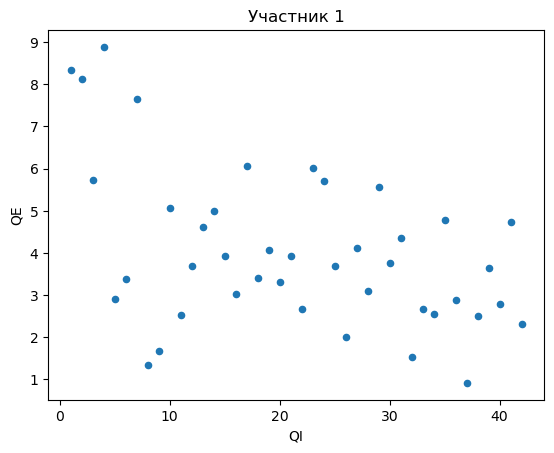

In [37]:
df2=df1.sort_values(by='QI').copy()
df2.plot(kind='scatter', x='QI',y='QE', title='Участник 1')

<Axes: >

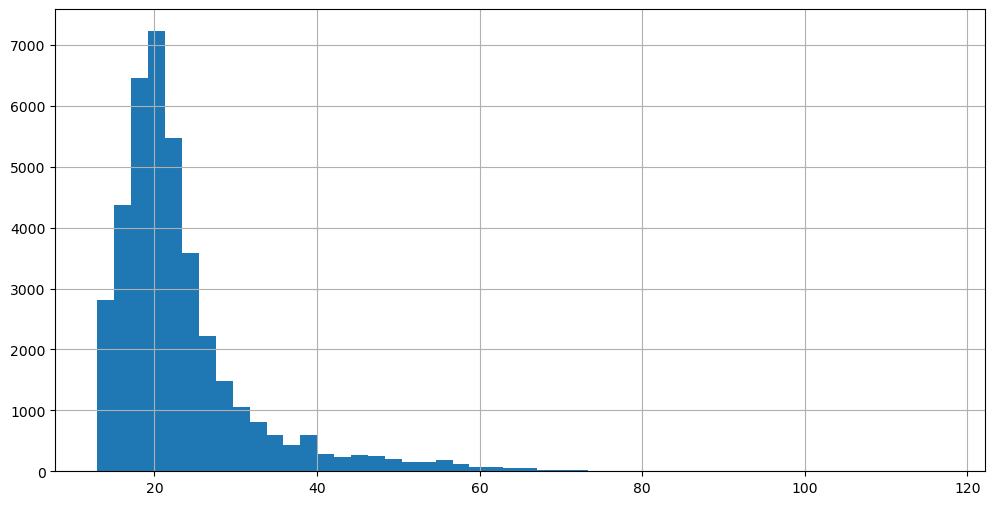

In [35]:
fig=plt.figure(figsize=(12,6))
file1['age'].hist(bins=50)

В тестировании в основном участвовала молодёжь 

Можно сопоставить уровень депрессивности и возраст

In [36]:
columns_names=file1.columns
scale_q_names=list(columns_names[:126])+['introelapse', 'testelapse', 'surveyelapse','time_diff']
scale_q_data=file1[scale_q_names]

In [37]:
tech_names=['country', 'source','screensize', 'uniquenetworklocation']
data_tech=file1[tech_names]

scale_t_names=['TIPI'+str(i) for i in range(1,11)]
scale_t_data=file1[scale_t_names]

scale_v_names=['VCL'+str(i) for i in range(1,17)]
scale_v_data=file1[scale_v_names]

personal_info_names=list(columns_names[157:162])+list(columns_names[164:171])
personal_info=file1[personal_info_names]

In [38]:
scales_q_answers=scale_q_data[['Q'+str(i)+'A' for i in range(1,43)]]
res=scales_q_answers.sum(axis=1)
res.name='result'
scales_q_answers=pd.concat([scales_q_answers, res], axis=1)
scales_q_answers.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,result
0,4,4,2,4,4,4,4,4,2,1,...,3,4,4,1,2,4,3,4,4,143
1,4,1,2,3,4,4,3,4,3,2,...,2,2,3,4,2,2,1,2,2,110
2,3,1,4,1,4,3,1,3,2,4,...,4,3,4,4,4,2,2,1,4,110
3,2,3,2,1,3,3,4,2,3,3,...,4,1,1,2,1,3,4,4,2,91
4,2,2,3,4,4,2,4,4,4,3,...,4,3,4,3,3,3,4,4,3,143


In [39]:
def levels(x, arr):
    for el in arr:
        if x<=el:
            return arr.index(el)
    return 'error'

In [43]:
res2=scales_q_answers['result'].apply(levels, arr=[i*42 for i in range(2,5)])
res2.name='depr_level_q'
[i*42 for i in range(2,5)]


[84, 126, 168]

In [44]:
scales_q_answers=pd.concat([scales_q_answers,res2], axis=1)
scales_q_answers.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,result,depr_level_q
0,4,4,2,4,4,4,4,4,2,1,...,4,4,1,2,4,3,4,4,143,2
1,4,1,2,3,4,4,3,4,3,2,...,2,3,4,2,2,1,2,2,110,1
2,3,1,4,1,4,3,1,3,2,4,...,3,4,4,4,2,2,1,4,110,1
3,2,3,2,1,3,3,4,2,3,3,...,1,1,2,1,3,4,4,2,91,1
4,2,2,3,4,4,2,4,4,4,3,...,3,4,3,3,3,4,4,3,143,2


In [45]:
names4=[]
for name in ['Q'+str(i)+'A' for i in range(1,43)]:
    if scales_q_answers[name].value_counts(normalize=True,sort=False).idxmax()==4:
        names4.append(name)
names4
 

['Q11A', 'Q13A', 'Q17A', 'Q34A', 'Q40A']

На эти вопросы выбирали вариант ответа 4, чем другие варианты (соответствует более тяжёлому проявлению депирессивного симптома)

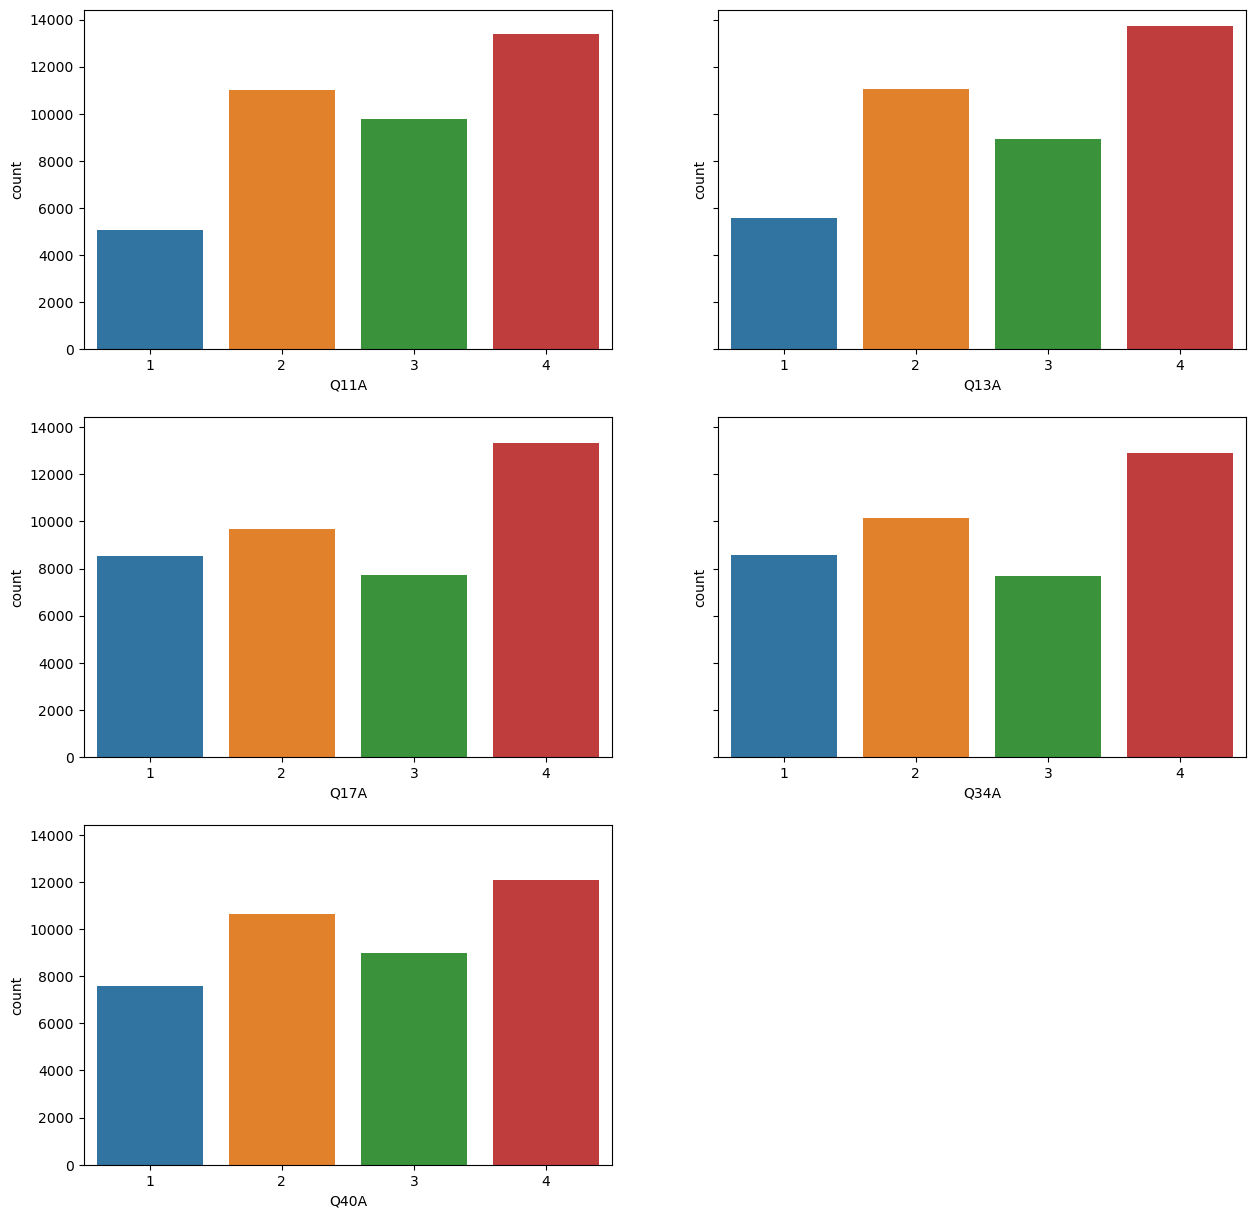

In [46]:
fig, ax=plt.subplots(3,2, figsize=(15,15), sharey=True)
i,j=0,0
for name in names4:
    sns.countplot(x=scales_q_answers[name], ax=ax[i,j])
    j+=1
    if j==2:
        j=0
        i+=1
fig.delaxes(ax[2,1])

В вопросах 11 и 13 видна существенная разница между количеством ответов 1 и 4, в остальных случаях разница не так велика (примерно в 1.5 раза). Возможно эти симптомы более распространены и у здоровых людей.

Q11	I found myself getting upset rather easily.

Q13	I felt sad and depressed.

Q17	I felt I wasn&#39;t worth much as a person.

Q34	I felt I was pretty worthless.

Q40	I was worried about situations in which I might panic and make a fool of myself.

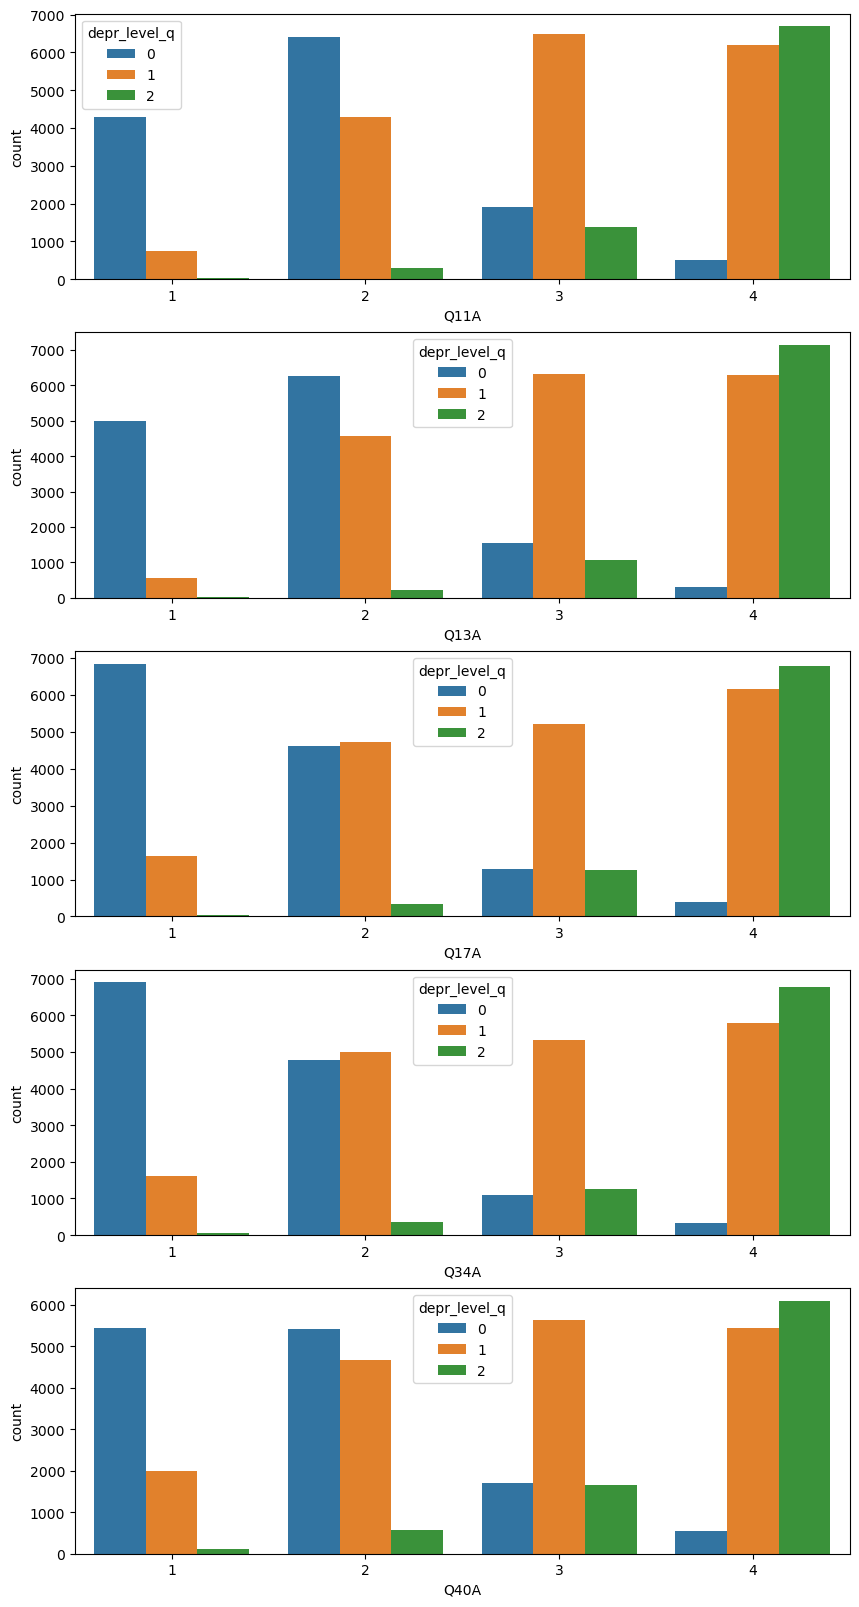

In [47]:
fig, ax=plt.subplots(5, figsize=(10,20))
i=0
for name in names4:
    sns.countplot(x=scales_q_answers[name], hue=scales_q_answers['depr_level_q'], ax=ax[i])
    i+=1

Видно, что вариант 4 обычно выбирают люди с целом более выраженными депрессивными симптомами

При этом люди с низким уровнем депрессивности с примерно одинаковой частотой отмечают у себя как и полное отсутствие симптомов 11, 13, 40, так и небольшое их присутствие.

In [50]:
scales_q_answers[(scales_q_answers['Q13A']==4) & (scales_q_answers['depr_level_q']==0)]\
[['Q'+str(i)+'A' for i in range(1,43)]+['result']]

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,result
166,1,1,2,1,2,3,1,2,3,2,...,1,1,1,3,2,3,3,1,3,84
457,1,1,3,1,2,1,1,1,1,4,...,3,2,2,4,4,1,1,1,2,74
783,1,1,2,1,1,1,2,1,3,2,...,3,2,1,3,4,2,4,1,3,79
837,3,1,3,1,3,2,1,1,1,3,...,2,1,1,4,3,2,2,1,4,83
970,1,1,2,2,4,2,1,1,1,3,...,4,1,1,4,3,1,1,1,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,3,1,2,1,1,2,1,1,4,1,...,1,3,2,2,1,4,3,1,4,84
38521,3,1,2,1,3,1,1,3,1,4,...,4,1,1,3,1,1,1,1,4,79
38827,1,1,1,1,2,2,1,3,2,2,...,3,3,1,3,2,1,3,1,2,82
39312,1,1,2,1,1,1,1,2,2,3,...,4,1,1,2,3,1,1,1,1,72


In [51]:
names1=[]
for name in ['Q'+str(i)+'A' for i in range(1,43)]:
    if scales_q_answers[name].value_counts(normalize=True,sort=False).idxmax()==1:
        names1.append(name)
names1 

['Q2A',
 'Q4A',
 'Q7A',
 'Q15A',
 'Q19A',
 'Q20A',
 'Q21A',
 'Q23A',
 'Q25A',
 'Q28A',
 'Q36A',
 'Q37A',
 'Q38A',
 'Q41A']

На эти вопросы отвечали чаще 1, чем другие варианты

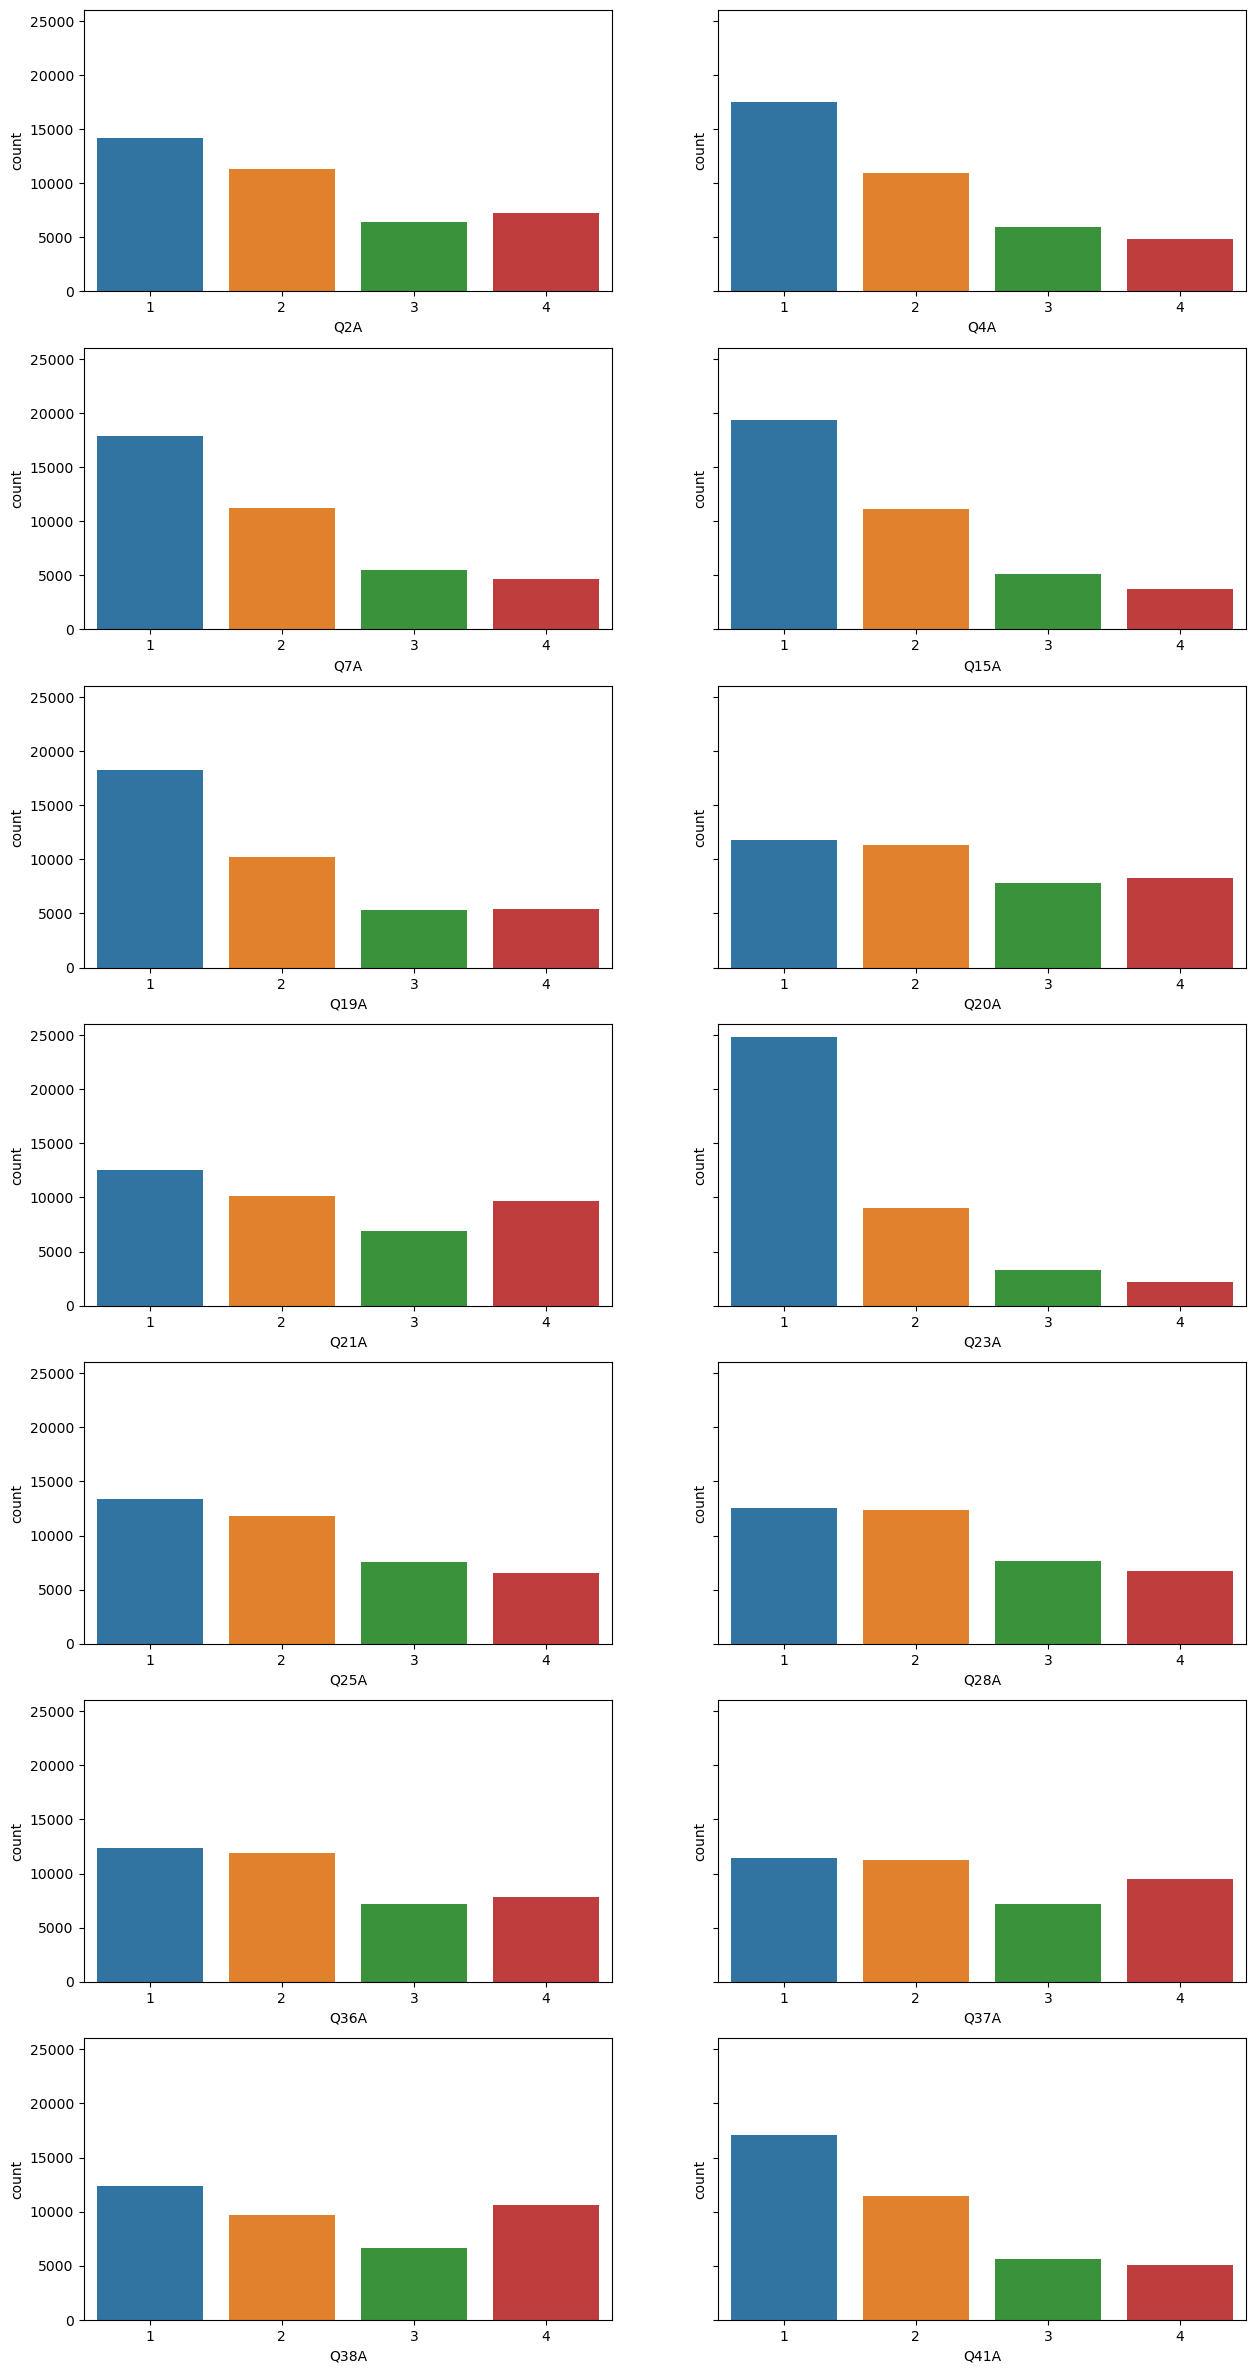

In [52]:
fig, ax=plt.subplots(7,2, figsize=(15,30), sharey=True)
i,j=0,0
for name in names1:
    sns.countplot(x=scales_q_answers[name], ax=ax[i,j])
    j+=1
    if j==2:
        j=0
        i+=1

На вопросы 15 и 23 реже всего отвечают "4", проверим, как ответы на эти вопросы соотносятся с проявлением депрессивных симптомов в целом

<Axes: xlabel='Q23A', ylabel='count'>

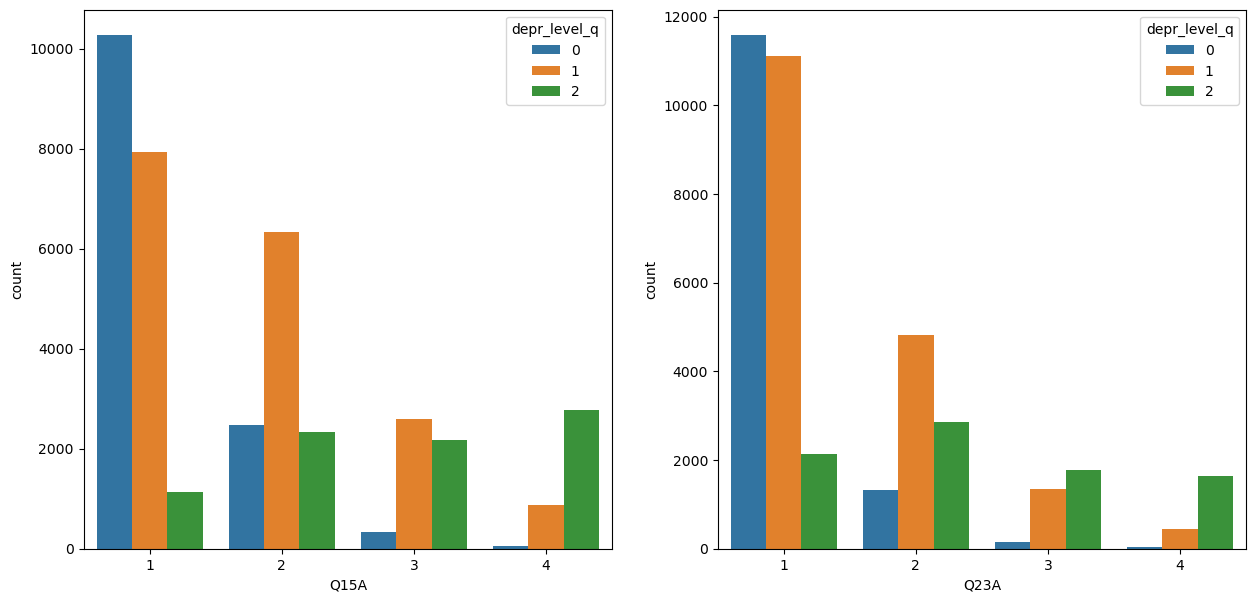

In [53]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
sns.countplot(x=scales_q_answers['Q15A'], hue=scales_q_answers['depr_level_q'], ax=ax[0])
sns.countplot(x=scales_q_answers['Q23A'], hue=scales_q_answers['depr_level_q'], ax=ax[1])

Для людей с выраженными депрессивными симптомами вопросы 15 и 23 не являются определяющими

Q15	I had a feeling of faintness

Q23	I had difficulty in swallowing

Больше похоже на физические симптомы, которые могут возникнуть по разным причинам

Доли ответов на вопросы 20, 21, 36, 37, 38 имеют небольшой разброс. Рассмотрим их в зависимости от степени выраженности депрессивных симптомов

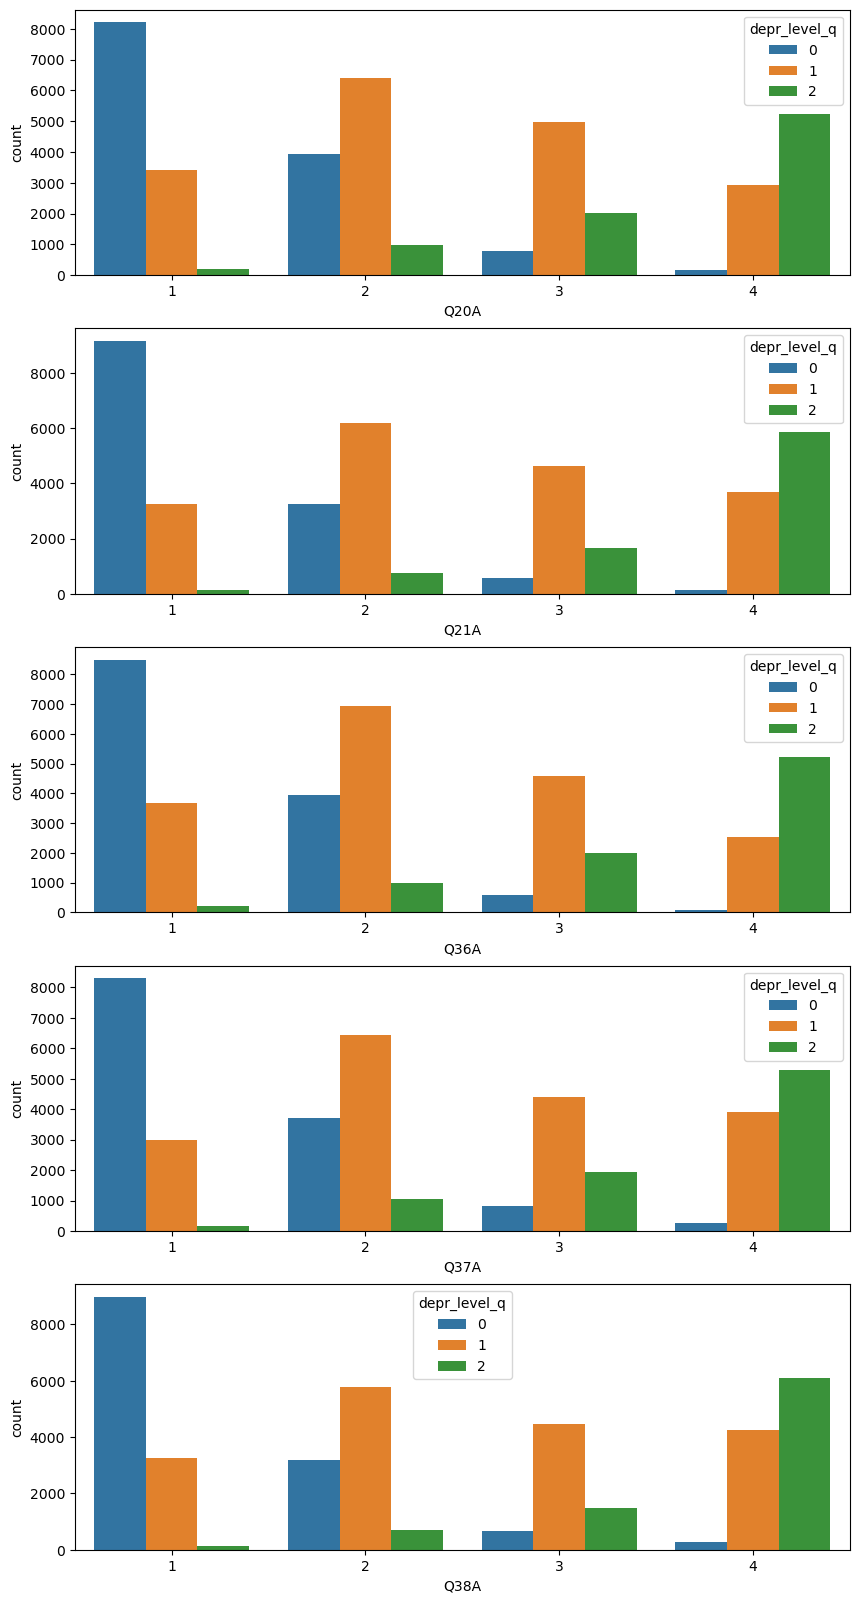

In [54]:
fig, ax=plt.subplots(5, figsize=(10,20))
i=0
for name in ['Q20A', 'Q21A', 'Q36A','Q37A','Q38A']:
    sns.countplot(x=scales_q_answers[name], hue=scales_q_answers['depr_level_q'], ax=ax[i])
    i+=1

Люди со средним проявлением депрессии (уровень 2) симптомы 21, 37, 38 встречаются примерно одинаково в разной степени интенсивности. Для людей с другими уровнями депрессивности прослеживается более чёткая связь между вариантом ответа и тяжестью депресси в целом.

Q21	I felt that life wasn't worthwhile

Q37	I could see nothing in the future to be hopeful about.

Q38	I felt that life was meaningless.

<AxesSubplot:>

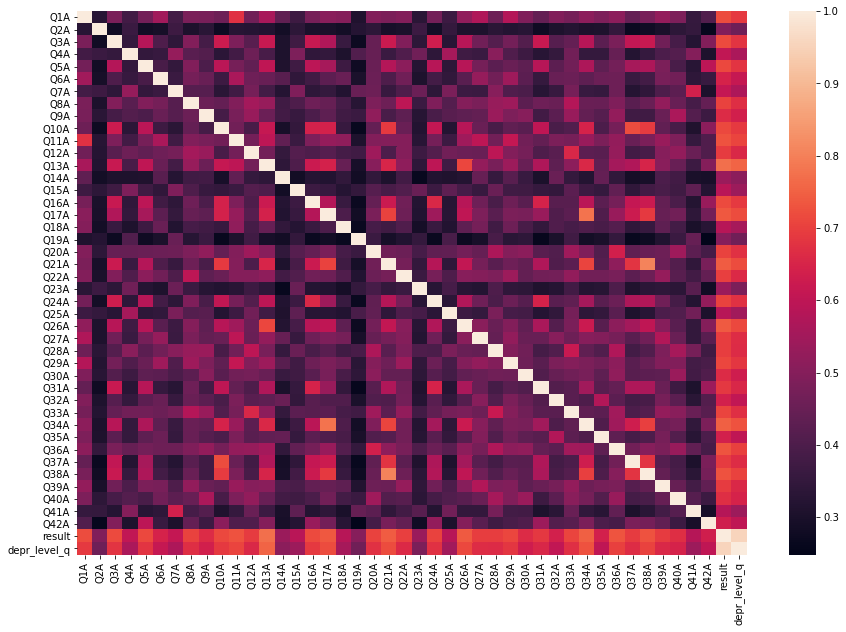

In [45]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(scales_q_answers.corr())

In [55]:
a=scales_q_answers.corr().unstack()['result']

In [56]:
b=a[:-2].sort_values()
important_q=b[-10:].index#чем больше корр тем больше результат зависит от вопроса
list(important_q)

['Q10A', 'Q3A', 'Q11A', 'Q36A', 'Q38A', 'Q17A', 'Q26A', 'Q21A', 'Q34A', 'Q13A']

In [57]:
#corr->1 - лин зав
#corr->0 - лин незав

<Axes: >

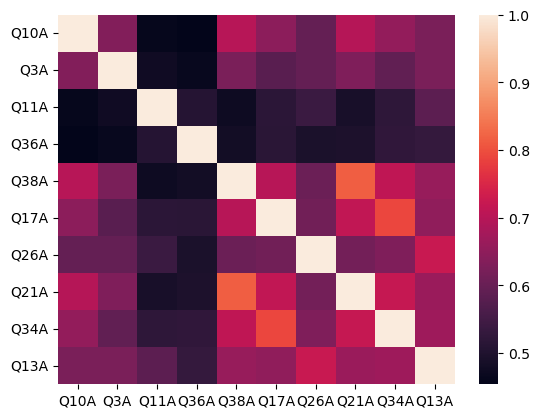

In [58]:
sns.heatmap(scales_q_answers[important_q].corr())

Есть существенная корреляция между вопросами 38-21 и 17-34

Q17	I felt I wasn't worth much as a person.  Q34	I felt I was pretty worthless

Q21	I felt that life wasn&#39;t worthwhile  Q38	I felt that life was meaningless

В целом, такой результат ожидаем, формулировки похожи

In [59]:
scales_q_answers[scales_q_answers['Q17A']==scales_q_answers['Q34A']][['Q17A', 'depr_level_q']].\
                                                                     value_counts(sort=False,normalize=True)

Q17A  depr_level_q
1     0               0.209781
      1               0.032823
      2               0.000781
2     0               0.108344
      1               0.101788
      2               0.004840
3     0               0.017251
      1               0.100617
      2               0.020920
4     0               0.005386
      1               0.161541
      2               0.235930
dtype: float64

In [60]:
scales_q_answers[scales_q_answers['Q17A']!=scales_q_answers['Q34A']][['Q17A', 'Q34A','depr_level_q']].\
                                                                     value_counts(sort=False,normalize=True)

Q17A  Q34A  depr_level_q
1     2     0               0.093480
            1               0.040000
            2               0.000733
      3     0               0.010696
            1               0.012527
            2               0.000513
      4     0               0.003077
            1               0.006667
            2               0.000733
2     1     0               0.098901
            1               0.037582
            2               0.000806
      3     0               0.029963
            1               0.087985
            2               0.008132
      4     0               0.004908
            1               0.029817
            2               0.007179
3     1     0               0.010110
            1               0.011355
            2               0.000366
      2     0               0.044615
            1               0.097143
            2               0.007692
      4     0               0.006813
            1               0.084103
            2

In [61]:
#уберём вопросы, между которыми есть существенная корреляция
important_q=list(important_q)
important_q.remove('Q38A')
important_q.remove('Q34A')
important_q

['Q10A', 'Q3A', 'Q11A', 'Q36A', 'Q17A', 'Q26A', 'Q21A', 'Q13A']

In [62]:
scales_q_answers1=scales_q_answers[important_q+['depr_level_q']]
scales_q_answers1.head()

,Q10A,Q3A,Q11A,Q36A,Q17A,Q26A,Q21A,Q13A,depr_level_q
0,1,2,4,4,3,4,1,4,2
1,2,2,2,3,4,3,2,4,1
2,4,4,2,4,4,1,4,4,1
3,3,2,2,1,3,2,1,1,1
4,3,3,2,4,4,4,3,4,2


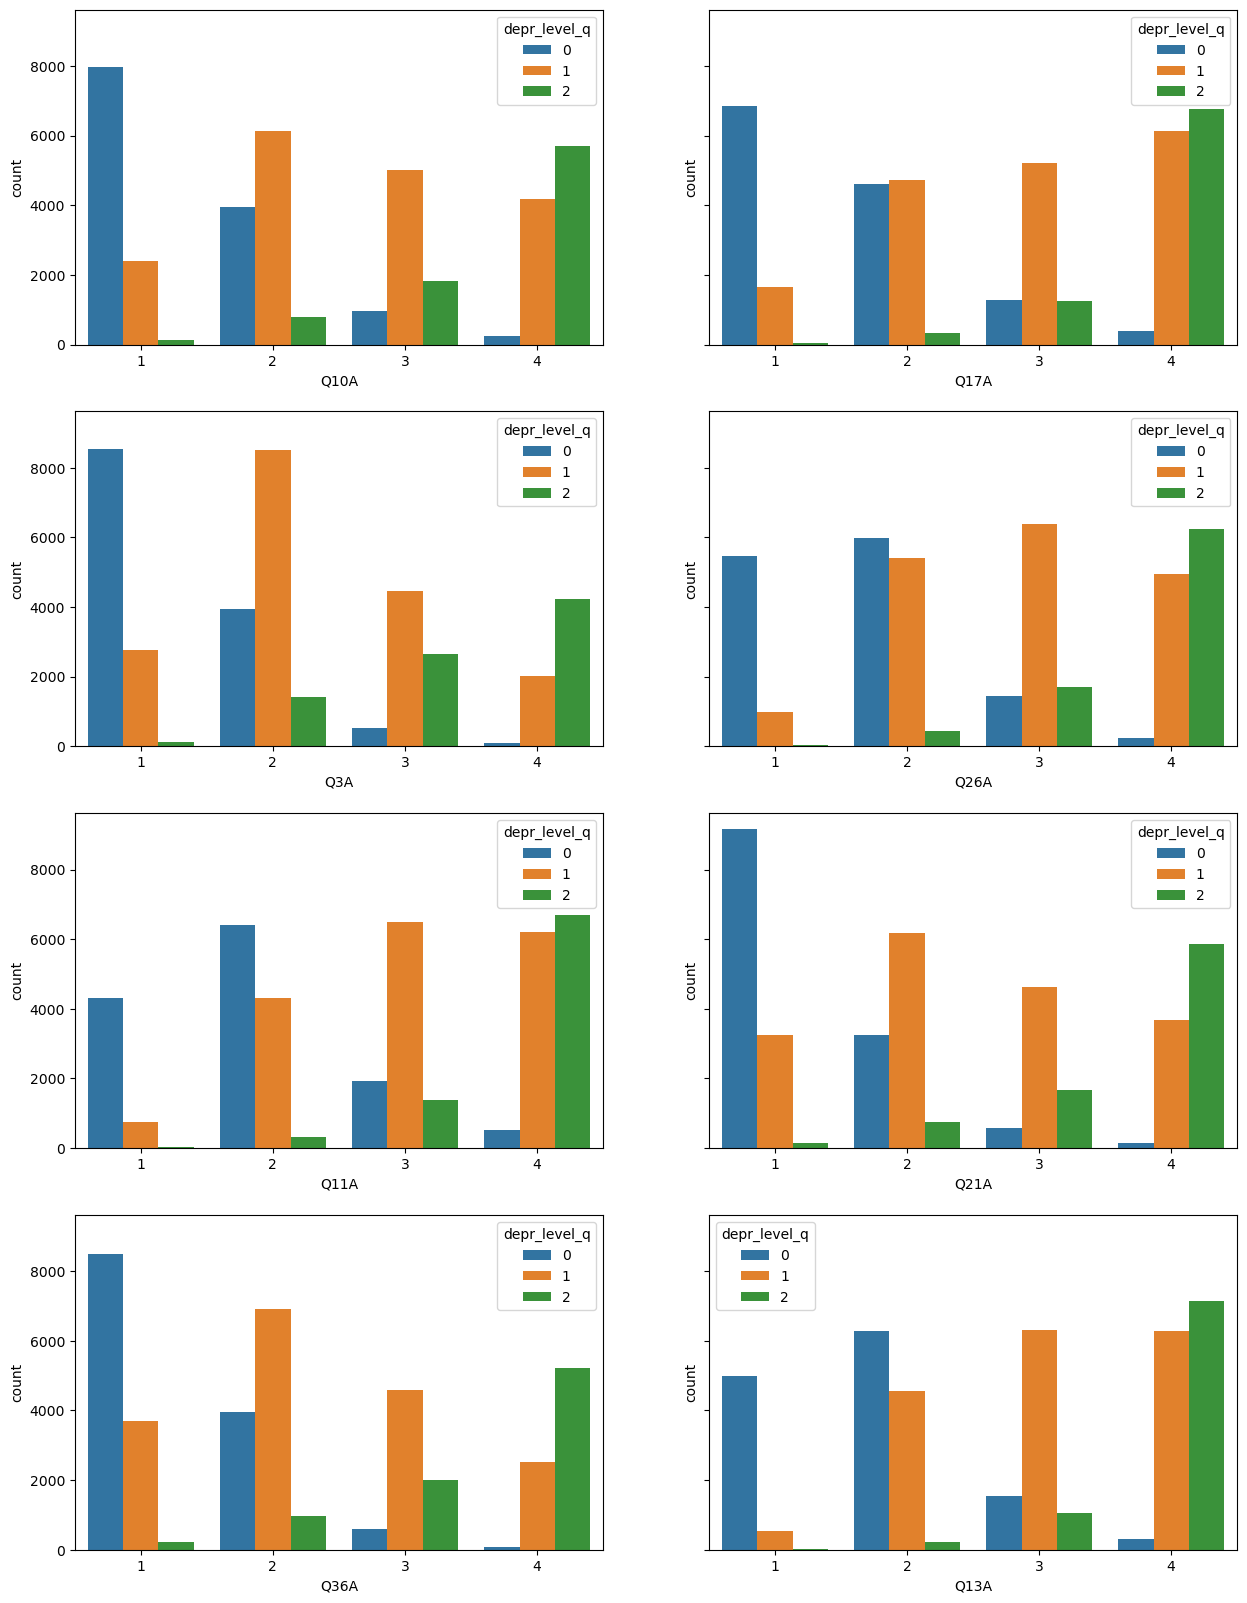

In [63]:
fig, ax=plt.subplots(4,2, figsize=(15,20),sharey=True)
i,j=0,0
for name in scales_q_answers1.columns[:-1]:
    sns.countplot(x=scales_q_answers1[name], hue=scales_q_answers1['depr_level_q'], ax=ax[i,j])
    i+=1
    if i==4:
        j+=1
        i=0

**Q10**	I felt that I had nothing to look forward to.
**Q17**	I felt I wasn&#39;t worth much as a person.

**Q3**	I couldn't seem to experience any positive feeling at all
**Q26**	I felt down-hearted and blue.

**Q11**	I found myself getting upset rather easily.
**Q21**	I felt that life wasn&#39;t worthwhile.

**Q36**	I felt terrified.
**Q13**	I felt sad and depressed.

Интересно, что существенное количество людей с низким уровнем депрессивности иногда чувствуют себя "грустными и депрессивными" (вопрос 13, вопрос 26 имеет похожую формулировку и ситуацию). Аналогичная ситуация в вопросе 11 скорее всего объясняется особенностями характера.

In [51]:
scales_q_answers[(scales_q_answers['Q3A']==2)&(scales_q_answers['depr_level_q']==3)][['Q10A', 'Q17A', 'Q26A', 'Q11A',\
                                                                                     'Q21A', 'Q36A', 'Q13A']].describe()

,Q10A,Q17A,Q26A,Q11A,Q21A,Q36A,Q13A
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,3.115854,3.560976,3.427938,3.672395,3.192905,3.293237,3.628049
std,0.893306,0.710547,0.728788,0.592702,0.892711,0.838573,0.625498
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [55]:
scales_q_answers[(scales_q_answers['Q3A']==1)&(scales_q_answers['Q13A']==4)][['Q10A', 'Q17A', 'Q26A', 'Q11A',\
                                                                                     'Q21A', 'Q36A', 'depr_level_q']].describe()

,Q10A,Q17A,Q26A,Q11A,Q21A,Q36A,depr_level_q
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,2.404054,2.850000,3.006757,3.217568,2.358108,2.506757,1.672973
std,1.108576,1.100098,0.999977,0.926217,1.098715,1.110271,0.784542
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000
75%,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000


<Axes: >

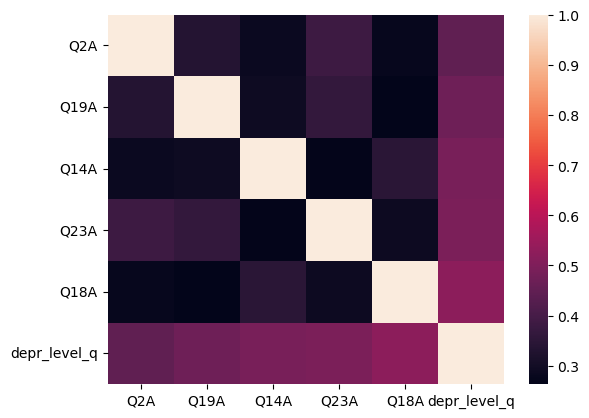

In [64]:
#less important
#b=a[:-2].sort_values()
not_important_q=b[:5].index
not_important_q=list(not_important_q)
scale_q_bad=scales_q_answers[not_important_q+['depr_level_q']]
sns.heatmap(scale_q_bad.corr())

In [65]:
#q14 (getting impatient) можно заменить остальными
#q2~q18~q19
not_important_q.remove('Q14A')
not_important_q.remove('Q18A')

In [66]:
scale_q_bad=scale_q_bad[not_important_q+['depr_level_q']]

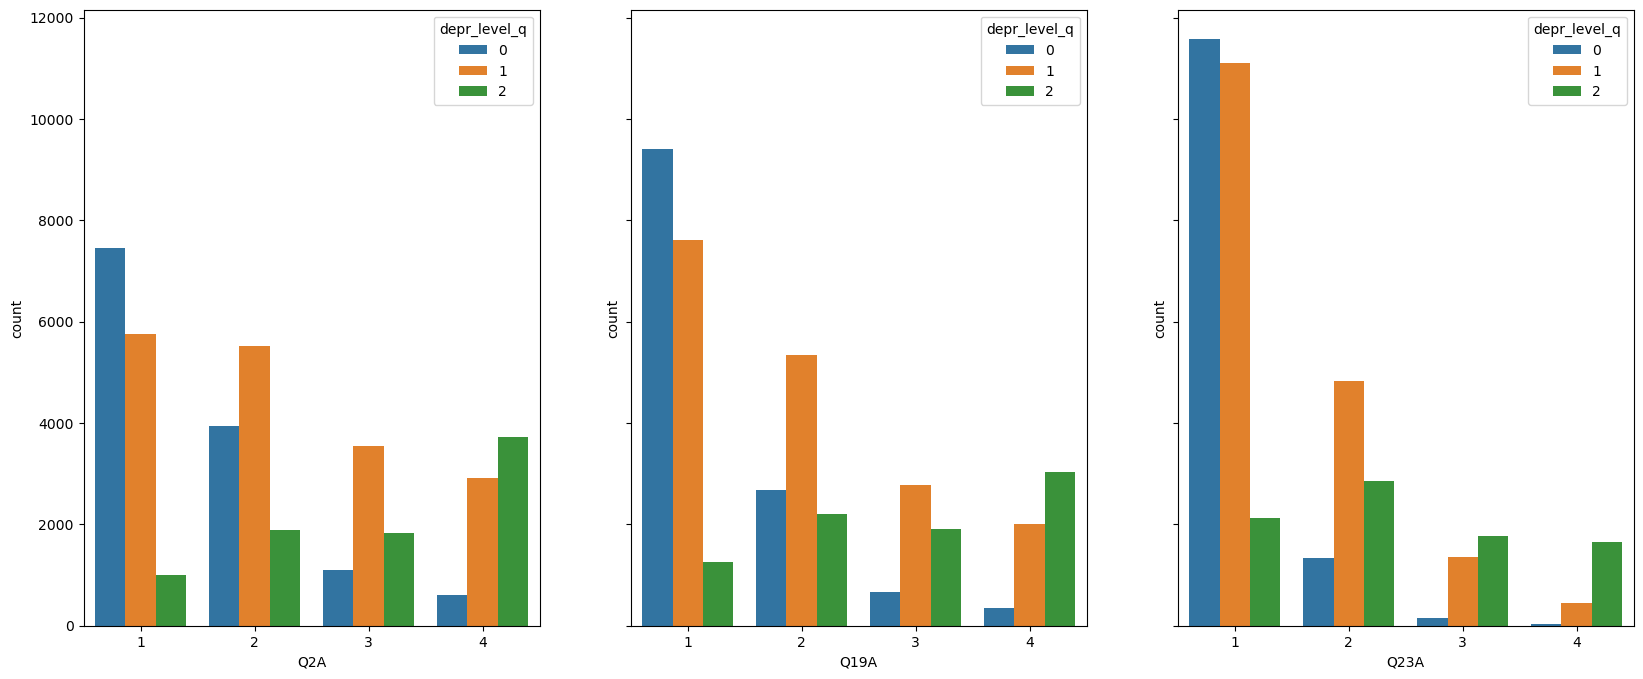

In [67]:
fig, ax=plt.subplots(1,3, figsize=(20,8), sharey=True)
i=0
for name in scale_q_bad.columns[:-1]:
    sns.countplot(x=scale_q_bad[name], hue=scale_q_bad['depr_level_q'], ax=ax[i])
    i+=1


Q2	I was aware of dryness of my mouth

Q19	I perspired noticeably (eg, hands sweaty) in the absence of high temperatures or physical exertion.

Q23	I had difficulty in swallowing.

Люди с высоким уровнем депрессии примерно с одинаковой частотой выбирают все варианты ответа (особенно на вопрос 23, где чаще всего выбирают вариант 2)

Люди с плохо выраженной депрессией почти не выбирают 4 вариант ответа (что в целом ожидаемо)

В целом вопросы касаются физических проявлений заболевания, для которых могут быть разные причины помимо психических (или как проявление тревоги или повышенного стресса, которые могут быть у людей и с, и без депрессии)

In [72]:
file1['age']=pd.cut(file1['age'], 10)

In [73]:
file1['age'].unique()[0]

Interval(12.896, 23.4, closed='right')

In [229]:
#объединить таблицы и тогда всё будет ок
for x in file1['age'].unique():
    fig=plt.figure(figsize=(10,5))
    sns.countplot(x=file1[file1['age']==x]['age'], hue=scales_q_answers['depr_level_q'])

ValueError: Length of grouper (26318) and axis (39272) must be same length

<Figure size 720x360 with 0 Axes>

__________

!!!

посмотреть зависимости депрессивности от пола, возраста, образования, религии, ориентации, семейных параметров

Посчитать результаты по шкале Т

Исправить тех инфу (размер экрана и локация оказались в персональной инфе)

In [29]:
scales_q_time=scale_q_data[['Q'+str(i)+'E' for i in range(1,43)]]
scales_q_time=pd.concat([scales_q_time, scales_q_answers['depr_level_q']], axis=1)
scales_q_time.head()

,Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,...,Q34E,Q35E,Q36E,Q37E,Q38E,Q39E,Q40E,Q41E,Q42E,depr_level_q
3,5081,6837,5521,4556,3269,3231,7138,3079,9650,4179,...,5620,16760,6427,3760,4112,2769,4432,3643,3698,1
4,3215,7731,4156,2802,5628,6522,2374,3054,2975,3524,...,2536,3725,2130,3952,10694,3231,3604,1950,6265,3
6,4325,4009,3604,4826,2842,2342,9018,3717,7023,3312,...,7122,8044,2242,3951,2272,3398,5101,93656,84607,2
7,4796,2618,5823,6596,7635,7384,11570,2958,12300,3605,...,1405,10145,3675,5432,2897,2732,9251,2954,8665,0
8,3470,2139,11043,1829,5847,3529,1855,3000,6066,2539,...,1567,8033,2036,3868,3682,2751,7497,2179,3662,3


In [30]:
res=scales_q_time.mean(axis=1)
res.name='mean_time'
scales_q_time=pd.concat([scales_q_time, res], axis=1)
scales_q_time.head()

,Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,...,Q35E,Q36E,Q37E,Q38E,Q39E,Q40E,Q41E,Q42E,depr_level_q,mean_time
3,5081,6837,5521,4556,3269,3231,7138,3079,9650,4179,...,16760,6427,3760,4112,2769,4432,3643,3698,1,5.896093e+03
4,3215,7731,4156,2802,5628,6522,2374,3054,2975,3524,...,3725,2130,3952,10694,3231,3604,1950,6265,3,3.800116e+03
6,4325,4009,3604,4826,2842,2342,9018,3717,7023,3312,...,8044,2242,3951,2272,3398,5101,93656,84607,2,1.057165e+06
7,4796,2618,5823,6596,7635,7384,11570,2958,12300,3605,...,10145,3675,5432,2897,2732,9251,2954,8665,0,5.388465e+03
8,3470,2139,11043,1829,5847,3529,1855,3000,6066,2539,...,8033,2036,3868,3682,2751,7497,2179,3662,3,4.467233e+03


<AxesSubplot:xlabel='depr_level_q', ylabel='mean_time'>

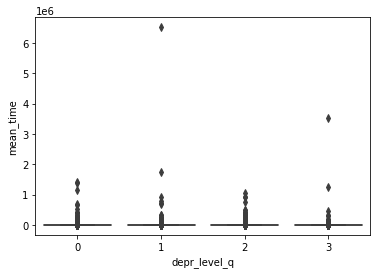

In [23]:
sns.boxplot(x='depr_level_q', y='mean_time', data=scales_q_time)

In [35]:
scales_q_time=scales_q_time.drop(list(scales_q_time[scales_q_time['mean_time']>=20000].index))

<AxesSubplot:xlabel='depr_level_q', ylabel='mean_time'>

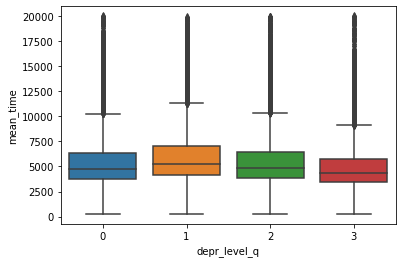

In [36]:
sns.boxplot(x='depr_level_q', y='mean_time', data=scales_q_time)

Большое количество выбросов, в среднем люди с разным уровнем депрессивности отвечают с одинаковой скоростью.

Макс время (в среднем и с учётом выбросов) показывают люди с небольшим уровнем депрессии. Возможно, они сомневаются в выборе ответа и оценке своего состояния (вроде всё не так плохо но и не так хорошо)

!!!

зависимость между тем, как одинаковые люди отвечали на разные вопросы

In [71]:
scales_t_answers=scales_t_answers.drop(['depr_level_t'], axis=1)

***Для теста TIPI:***

вопросы попарно противоположны (1 и 6, 2 и 7, и тд)

Ответы на вопросы 2, 4, 6, 8, 10 переведём: |8-ответ|

затем возьмём полусуммы для каждой пары

получим характеристики: экстравертность, доброжелательность, осознанность, эмоциональная стабильность, открытость (новому)

In [74]:
scales_t_answers.loc[:, ['TIPI'+str(i*2) for i in range(1,6)]]=8-scales_t_answers.loc[:, ['TIPI'+str(i*2) for i in range(1,6)]]

In [80]:
scales_t_answers['Extraversion']=(scales_t_answers['TIPI1']+scales_t_answers['TIPI6'])/2
scales_t_answers['Agreeableness']=(scales_t_answers['TIPI2']+scales_t_answers['TIPI7'])/2
scales_t_answers['Conscientiousness']=(scales_t_answers['TIPI3']+scales_t_answers['TIPI8'])/2
scales_t_answers['Em_stability']=(scales_t_answers['TIPI4']+scales_t_answers['TIPI9'])/2
scales_t_answers['Openness']=(scales_t_answers['TIPI5']+scales_t_answers['TIPI10'])/2

___

In [81]:
scales_v_answers=scale_v_data[['VCL'+str(i) for i in range(1,17)]]

Слова, предложенные в вопросах 6, 9, 12 - несуществующие, поэтому меняем ответы на противоположные

In [82]:
scales_v_answers['VCL6']=scales_v_answers['VCL6'].replace({0:1, 1:0})
scales_v_answers['VCL9']=scales_v_answers['VCL6'].replace({0:1, 1:0})
scales_v_answers['VCL12']=scales_v_answers['VCL6'].replace({0:1, 1:0})

In [83]:
res=scales_v_answers.sum(axis=1)
res.name='result'
scales_v_answers=pd.concat([scales_v_answers, res], axis=1)
scales_v_answers.describe()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,result
count,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000,39272.000000
mean,0.816409,0.584921,0.153774,0.871002,0.690466,0.959539,0.084157,0.170554,0.040461,0.874745,0.074430,0.040461,0.294205,0.570483,0.851548,0.935246,8.012401
std,0.387156,0.492742,0.360736,0.335202,0.462307,0.197041,0.277626,0.376124,0.197041,0.331012,0.262472,0.197041,0.455690,0.495014,0.355552,0.246094,2.831509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [84]:
res2=scales_v_answers['result'].apply(levels, arr=list(res.describe()[4:]))
res2.name='level_v'
scales_v_answers=pd.concat([scales_v_answers,res2], axis=1)
scales_v_answers.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,result,level_v
0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,9,2
1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,9,2
2,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1,8,1
3,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,1,8,1
4,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,11,3


<Axes: >

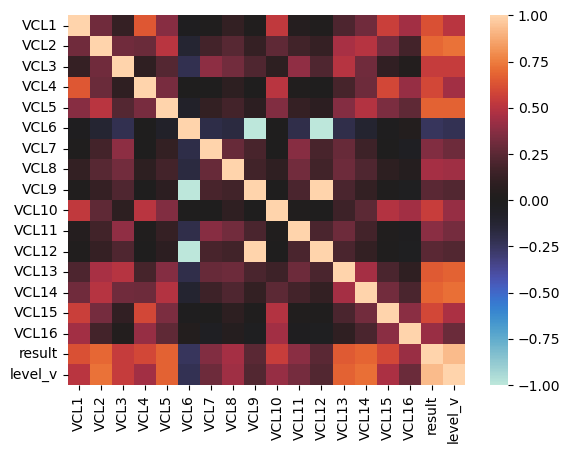

In [85]:
sns.heatmap(scales_v_answers.corr(), center=0)

In [86]:
scales_v_answers.corr().unstack()['result'].abs().sort_values()

VCL9       0.244283
VCL12      0.244283
VCL6       0.244283
VCL7       0.352889
VCL11      0.375927
VCL16      0.419977
VCL8       0.451156
VCL3       0.539386
VCL10      0.547284
VCL4       0.588515
VCL15      0.589698
VCL1       0.624443
VCL13      0.652814
VCL5       0.673680
VCL14      0.684987
VCL2       0.692561
level_v    0.926106
result     1.000000
dtype: float64

результат зависит в основном от 2,5,14
не особо зависит от 6,9,12

При этом несуществующие слова - 6, 9, 12

<Axes: xlabel='VCL12', ylabel='count'>

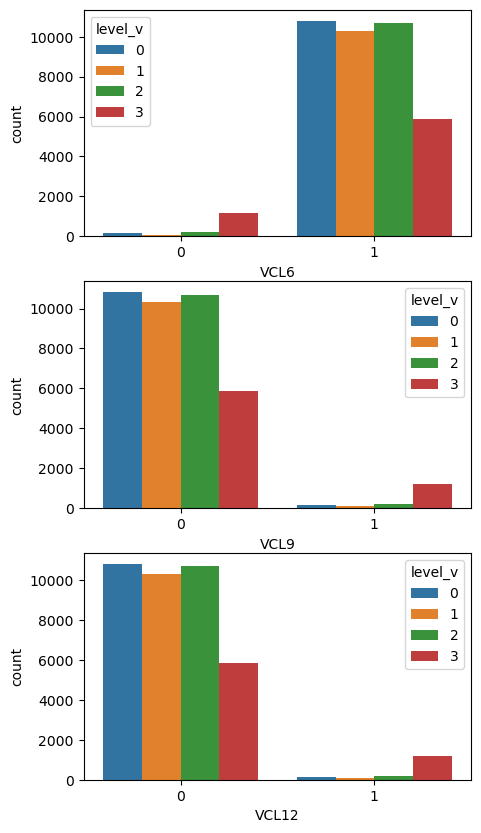

In [87]:
fig, ax=plt.subplots(3, figsize=(5,10))
sns.countplot(x=scales_v_answers['VCL6'],hue=scales_v_answers['level_v'], ax=ax[0])
sns.countplot(x=scales_v_answers['VCL9'],hue=scales_v_answers['level_v'], ax=ax[1])
sns.countplot(x=scales_v_answers['VCL12'],hue=scales_v_answers['level_v'], ax=ax[2])

cuivocal, florted, verdid

<Axes: xlabel='VCL5', ylabel='count'>

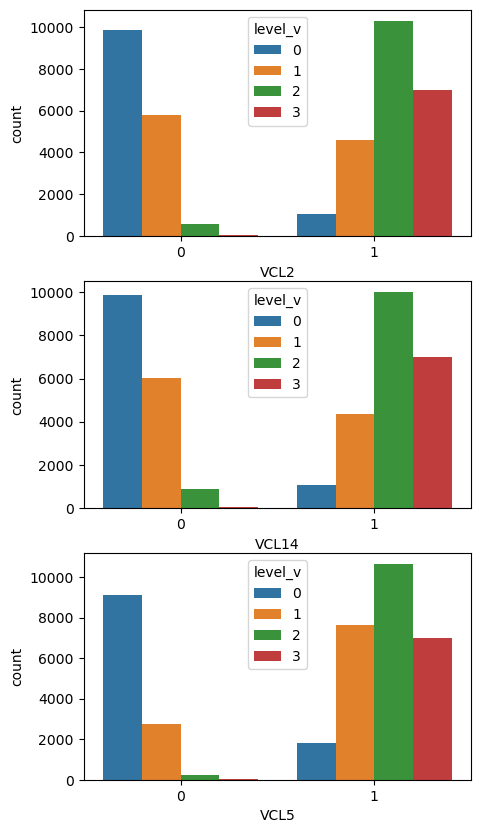

In [88]:
fig, ax=plt.subplots(3, figsize=(5,10))
sns.countplot(x=scales_v_answers['VCL2'],hue=scales_v_answers['level_v'], ax=ax[0])
sns.countplot(x=scales_v_answers['VCL14'],hue=scales_v_answers['level_v'], ax=ax[1])
sns.countplot(x=scales_v_answers['VCL5'],hue=scales_v_answers['level_v'], ax=ax[2])

In [76]:
#scales_v_answers['level_v']=scales_v_answers['level_v'].replace({0:3, 1:2, 2:1, 3:0})

3 - самые грамотные, 0 - неграмотные

In [89]:
personal_info=personal_info.merge(scales_v_answers['level_v'], left_index=True,right_index=True)

In [90]:
personal_info[personal_info['level_v']==3]['age'].describe()

count    7037.000000
mean       28.599545
std        13.027726
min        13.000000
25%        19.000000
50%        24.000000
75%        35.000000
max        85.000000
Name: age, dtype: float64

In [91]:
personal_info[personal_info['level_v']==0]['age'].describe()

count    10957.000000
mean        21.945058
std          5.559750
min         13.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         99.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='count'>

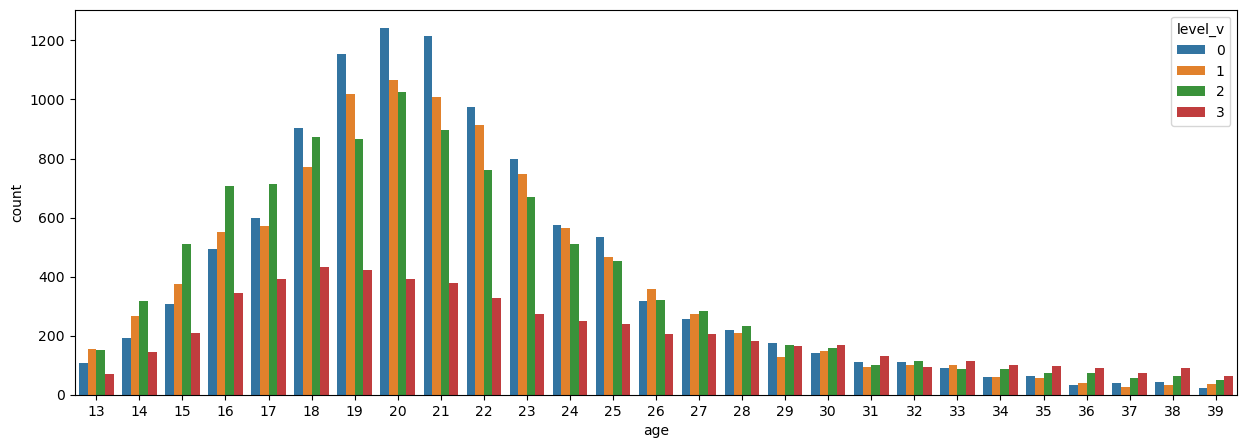

In [92]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x=personal_info[personal_info['age']<40]['age'], hue=personal_info['level_v'])

<Axes: xlabel='age', ylabel='count'>

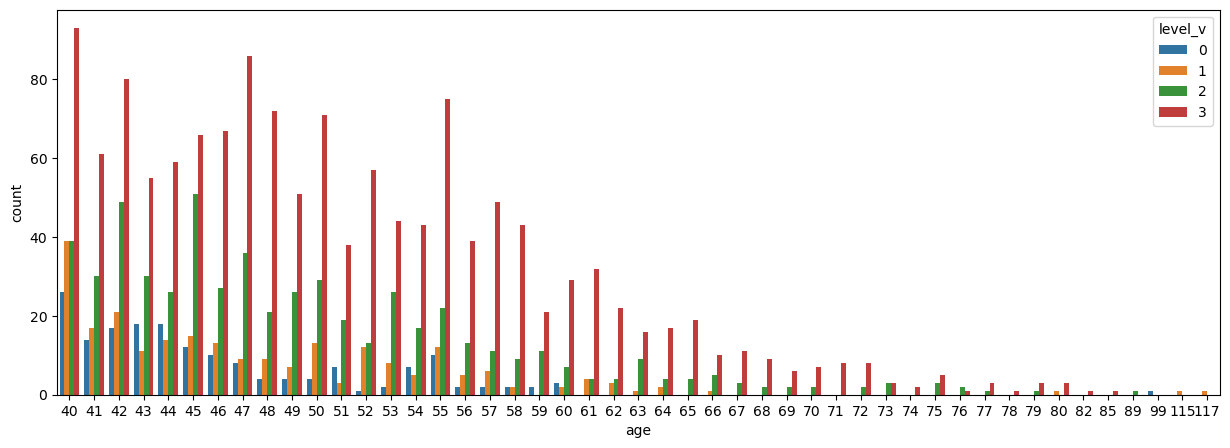

In [93]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x=personal_info[personal_info['age']>=40]['age'], hue=personal_info['level_v'])

In [94]:
personal_info[personal_info['age']>=40]['level_v'].value_counts()

3    1387
2     564
1     237
0     174
Name: level_v, dtype: int64

In [95]:
personal_info.groupby('major')

In [96]:
personal_info=personal_info.merge(scales_q_answers['depr_level_q'], left_index=True,right_index=True)

In [97]:
personal_info=personal_info.merge(scales_t_answers[['Extraversion', 'Agreeableness','Conscientiousness',\
                                                   'Em_stability','Openness']], left_index=True,right_index=True)


<Axes: xlabel='depr_level_q', ylabel='count'>

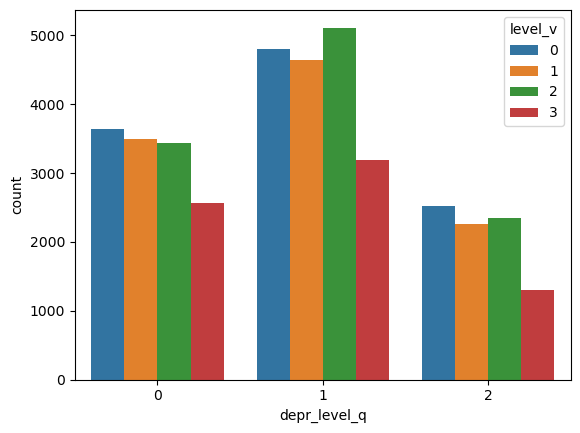

In [98]:
sns.countplot(x=personal_info['depr_level_q'], hue=personal_info['level_v'])

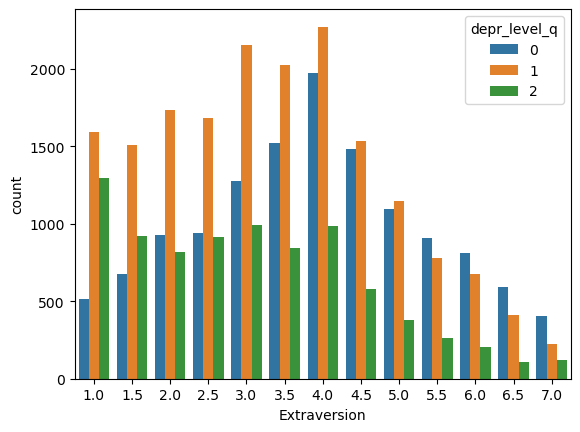

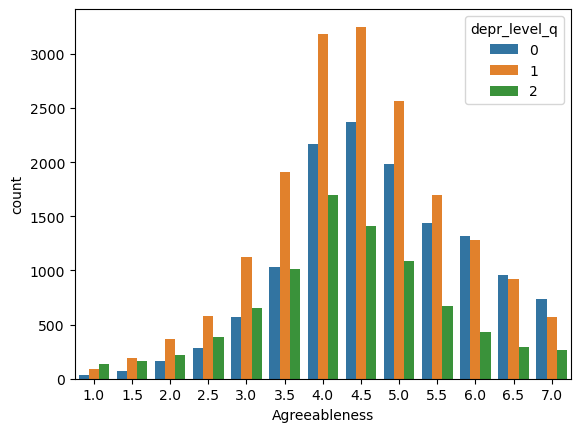

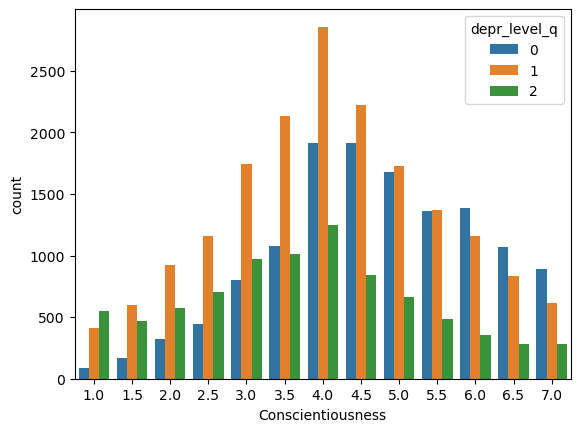

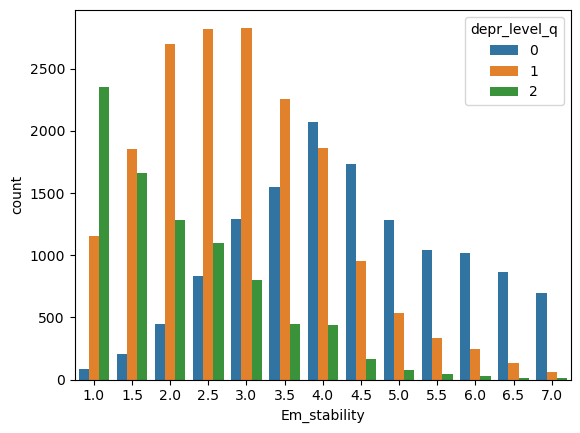

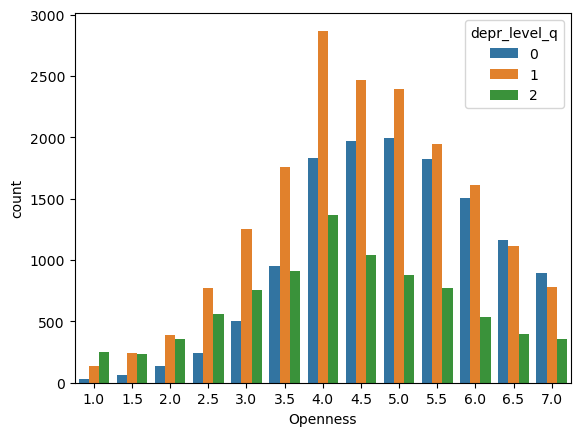

In [100]:
quality_names=['Extraversion', 'Agreeableness','Conscientiousness','Em_stability','Openness']
for i in range(5):
    fig=plt.figure()
    sns.countplot(x=personal_info[quality_names[i]], hue=personal_info['depr_level_q'])

Попробовать другие виды графиков??

В целом видно, что люди, оценивающие себя как замкнутые, эмоционально не стабильные, более склонны иметь выраженную депрессию

<Axes: xlabel='education', ylabel='count'>

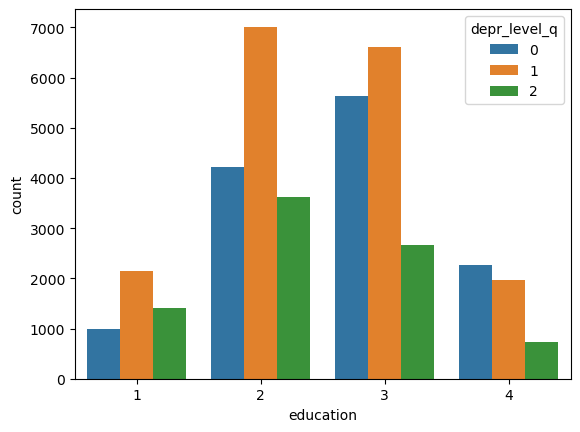

In [102]:
sns.countplot(x=personal_info['education'], hue=personal_info['depr_level_q'])

Среди людей с школьным образованием и ниже чаще встречаются проблемы с депрессией, чем среди людей с высшим образованием.

Сколько лет тем, у кого низкий уровень образования?

In [105]:
personal_info[personal_info['education']==1]['age'].describe()

count    4541.000000
mean       17.403435
std         6.913227
min        13.000000
25%        15.000000
50%        16.000000
75%        17.000000
max       115.000000
Name: age, dtype: float64

В основном люди, не окончившие старшую школу - школьники, часть из которых её не поступала туда(наверное)

In [106]:
personal_info[personal_info['education']==2]['age'].describe()

count    14865.000000
mean        21.316112
std          7.766124
min         13.000000
25%         18.000000
50%         19.000000
75%         21.000000
max        117.000000
Name: age, dtype: float64

В основном люди, окончившие только старшую школу, по возрасту подходят под студентов

In [108]:
personal_info[(personal_info['education']==1)&(personal_info['age']>17)]['age'].describe()

count    851.000000
mean      26.905993
std       11.712059
min       18.000000
25%       19.000000
50%       23.000000
75%       29.500000
max      115.000000
Name: age, dtype: float64

In [109]:
personal_info[(personal_info['education']==2)&(personal_info['age']>21)]['age'].describe()

count    3574.000000
mean       30.881365
std        10.980120
min        22.000000
25%        23.000000
50%        26.000000
75%        35.000000
max       117.000000
Name: age, dtype: float64

In [114]:
file1['country'].value_counts()

MY    21223
US     8161
GB     1174
CA      973
ID      873
      ...  
IM        1
KY        1
AW        1
SR        1
VC        1
Name: country, Length: 145, dtype: int64

Особенно много студентов из Маллазии, также существенная доля - из США, Великобритании

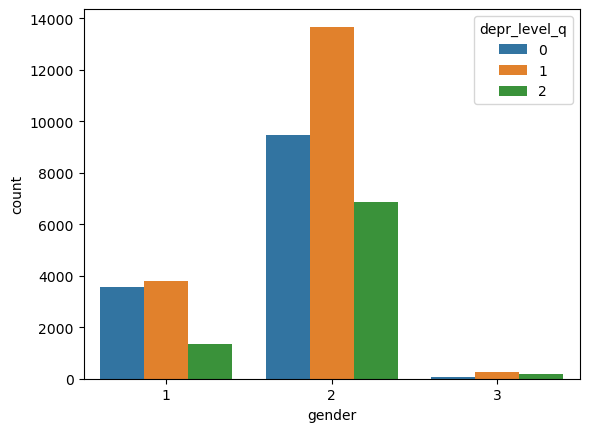

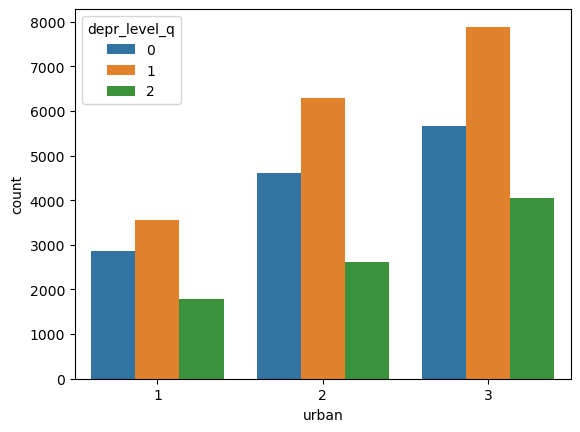

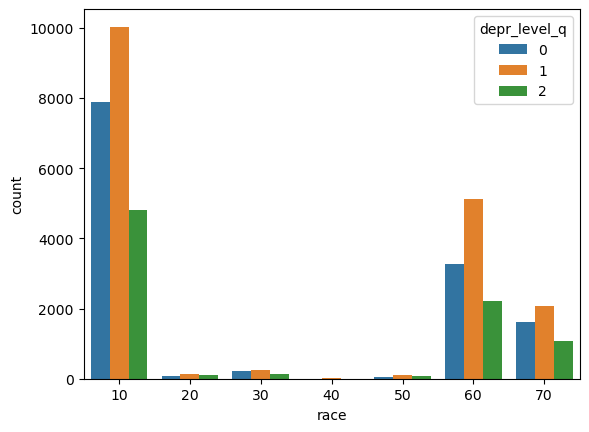

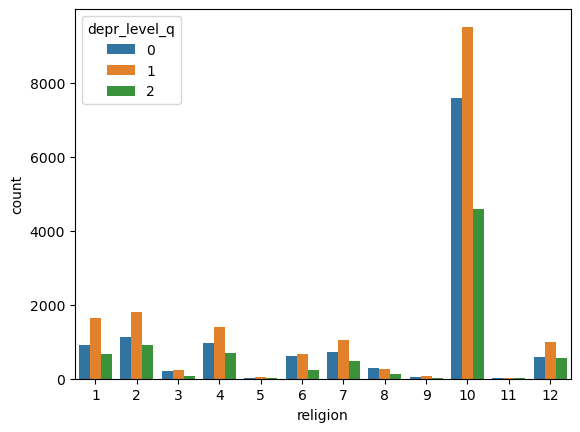

In [126]:
names=['gender', 'urban', 'race','religion']
for x in names:
    fig=plt.figure()
    sns.countplot(x=personal_info[x], hue=personal_info['depr_level_q'])

Так как большая часть учатников опроса проживают в Маллазии, не удивительно, что преобрадающая раса - азиаты, а религия - мусульмане. 


In [134]:
for x in list(personal_info['religion'].unique()):
    print(x, personal_info[personal_info['religion']==x]['depr_level_q'].value_counts(normalize=True)[2])

12 0.2604411074612858
7 0.20831470719713902
4 0.22756827048114434
10 0.2112812471174246
2 0.23825678496868477
6 0.1594014313597918
1 0.2089644513137558
8 0.19593613933236576
3 0.16159695817490494
5 0.256198347107438
11 0.25
9 0.15492957746478872


In [135]:
for x in list(personal_info['religion'].unique()):
    print(x, personal_info[personal_info['religion']==x]['depr_level_q'].value_counts(normalize=True)[0])

12 0.2731112153918348
7 0.32051855163164955
4 0.31697009102730817
10 0.34973710912277467
2 0.29097077244258873
6 0.4066363044892648
1 0.28531684698608967
8 0.4034833091436865
3 0.41254752851711024
5 0.2727272727272727
11 0.296875
9 0.33098591549295775


In [124]:
personal_info[personal_info['gender']==2]['depr_level_q'].value_counts(normalize=True)

1    0.455387
0    0.315786
2    0.228827
Name: depr_level_q, dtype: float64

In [125]:
personal_info[personal_info['gender']==1]['depr_level_q'].value_counts(normalize=True)

1    0.43590
0    0.40847
2    0.15563
Name: depr_level_q, dtype: float64

Среди мужчин доля людей с выраженной депрессией (15.5%) меньше, чем в случае с женщинами (22%)

Также среди мужчин больше людей в норме (40%), чем среди женщин (31%)

Посмотреть, на какие вопросы мужчины и женщины отвечают по-разному или чаще выбирают 4